$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 2** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Classification**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Divya** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 23/4** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Name, Personal no., email** <br />

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

# Theoretical problems

## [Naive Bayes Classifier, 6 points]

A psychologist does a small survey on ''happiness''. Each respondent provides a vector with entries 1 or 0 corresponding to if they answered “yes” or “no” to a question respectively. The question vector has attributes 
$$
x = (\mbox{rich, married, healthy}) \tag{1}
$$

Thus a response $(1, 0, 1)$ would indicate that the respondent was
''rich'', ''unmarried'' and ''healthy''. In addition, each respondent
gives a value $c = 1$ if they are content wih their life and $c = 0$
if they’re not. The following responses were obtained.

$$
c = 1: (1, 1, 1),(0, 0, 1),(1, 1, 0),(1, 0, 1) \\
c = 0: (0, 0, 0),(1, 0, 0),(0, 0, 1),(0, 1, 0)
$$

1. Using naive Bayes, what is the probability that a person is ''not rich'', ''married'' and ''healthy'' is ''content''?

2. What is the probability that a person who is ''not rich'' and ''married'' is content ? (i.e. we do not know if they are ''healthy'')

## [Solution]
Same number of training data labeled 1 and 0: can use an uninformative uniform prior 1/k=1/2. We will  a Bernoulli distribution likelihood, just need to get their probabiliy values from the sample means.

Fit distributions to sample data: MLE is the sample mean. So I guess $p_1 = \mu_1 = (\mu_{11}, \mu_{12}, \mu_{13}) = (3/4, 2/4, 3/4)$ and $\mu_2 = p_2 = (\mu_{21}, \mu_{22}, \mu_{23}) = (1/4, 1/4, 1/4)$. Ah since we're doing naive bayes we just have a product of three bernoulli dists instead of vector valued means. 

Could use a prior where we account for the label -> feature frequency, i.e. "how many happy people are married".

Since we're using a naive-bayes classifier, we assume that the elements of each feature vector are independed. This means that we can write the likelihood as

$p(x_{new}| t_{new} = k, X, t) = p(x_{new 1}| t_{new} = k, X, t) p(x_{new 2}| t_{new} = k, X, t) p(x_{new 3}| t_{new} = k, X, t)$

So using $\mu_{1,2}$ from above and the probability mass function of the Bernoulli distribution we get:

$p(x_{new}| t_{new} = k, X, t) = \mu_{k1}^{x_1}(1-\mu_{k1})^{(1-x_1)} \cdot \mu_{k2}^{x_2}(1-\mu_{k2})^{(1-x_2)} \cdot \mu_{k3}^{x_3}(1-\mu_{k3})^{(1-x_3)}$

So for $k=1$ we get:
$p(x_{new}| t_{new} = 1, X, t) = \mu_{11}^{x_1}(1-\mu_{11})^{(1-x_1)} \cdot \mu_{12}^{x_2}(1-\mu_{12})^{(1-x_2)} \cdot \mu_{13}^{x_3}(1-\mu_{13})^{(1-x_3)}$

With values from $\mu_1$:

$p(x_{new}| t_{new} = 1, X, t) = (3/4)^{x_1}(1-(3/4))^{(1-x_1)} \cdot (2/4)^{x_2}(1-(2/4))^{(1-x_2)} \cdot (3/4)^{x_3}(1-(3/4))^{(1-x_3)}$

Analagous steps for $k=2$:

$p(x_{new}| t_{new} = 2, X, t) = \mu_{21}^{x_1}(1-\mu_{21})^{(1-x_1)} \cdot \mu_{22}^{x_2}(1-\mu_{22})^{(1-x_2)} \cdot \mu_{23}^{x_3}(1-\mu_{23})^{(1-x_3)}$

Plugging in values from $\mu_2$:

$p(x_{new}| t_{new} = 2, X, t) = (1/4)^{x_1}(1-(1/4))^{(1-x_1)} \cdot (1/4)^{x_2}(1-(1/4))^{(1-x_2)} \cdot (1/4)^{x_3}(1-(1/4))^{(1-x_3)}$

Since we have already assumed the prior distributions $p(t_{new}=1) = p(t_{new}=2) = 1/2$ we now have all the parts needed to apply Bayes rule:

$p(t_{new} = 1 | x_{new}, X, t) = \frac{p(x_{new}| t_{new} = 1, X, t) p(t_{new}=1)}{\sum_j p(x_{new}| t_{new} = j, X, t) p(t_{new}=j)}$

For simplicity, we precompute the likelihoods:
### [Test case 1]
$$ p(x_{new}| t_{new} = 1, X, t) =  (3/4)^{x_1}(1-(3/4))^{(1-x_1)} \cdot (2/4)^{x_2}(1-(2/4))^{(1-x_2)} \cdot (3/4)^{x_3}(1-(3/4))^{(1-x_3)}$$
$$ p(x_{new}| t_{new} = 2, X, t) = (1/4)^{x_1}(1-(1/4))^{(1-x_1)} \cdot (1/4)^{x_2}(1-(1/4))^{(1-x_2)} \cdot (1/4)^{x_3}(1-(1/4))^{(1-x_3)} $$

Plugging in the values from $x_{new}$:

$$ p(x_{new}| t_{new} = 1, X, t) =  (3/4)^{0}(1-(3/4))^{(1-0)} \cdot (2/4)^{1}(1-(2/4))^{(1-1)} \cdot (3/4)^{1}(1-(3/4))^{(1-1)} = (1-(3/4))\cdot (2/4)\cdot (3/4) = 3/32$$
$$ p(x_{new}| t_{new} = 2, X, t) = (1/4)^{0}(1-(1/4))^{(1-0)} \cdot (1/4)^{1}(1-(1/4))^{(1-1)} \cdot (1/4)^{1}(1-(1/4))^{(1-1)} = (1-(1/4)) \cdot (1/4) \cdot (1/4) = 3/64$$

In conclusion, when also plugging in the prior probabilities $p(t_{new}=1) = p(t_{new}=2) = 1/2$ we get:

$ p(t_{new} = 1 | x_{new}, X, t) = \frac{3/32 \cdot 1/2}{3/32 \cdot 1/2 + 3/64\cdot1/2} = \frac{3/32\cdot 1/2}{3/32\cdot1/2} \frac{1}{1 + 1/2} = \frac{2}{2 + 1} = 2/3$

So based on this small data set and using naive bayes, a person that is not rich but married and healthy has about a $.66$ probability of being content.

### [Test case 2]
When one or more features are missing from a test feature vector, we can marginalize over that feature. This means we must consider all possibilities for the missing feature, i.e. both healthy and not healthy:

$p(x_{new}| t_{new} = k, X, t) = \sum_{x_3 = 0}^1\mu_{k1}^{x_1}(1-\mu_{k1})^{(1-x_1)} \cdot \mu_{k2}^{x_2}(1-\mu_{k2})^{(1-x_2)} \cdot \mu_{k3}^{x_3}(1-\mu_{k3})^{(1-x_3)}$
$p(x_{new}| t_{new} = k, X, t) = (\mu_{k3} + (1-\mu_{k3})) \mu_{k1}^{x_1}(1-\mu_{k1})^{(1-x_1)} \cdot \mu_{k2}^{x_2}(1-\mu_{k2})^{(1-x_2)}$
$p(x_{new}| t_{new} = k, X, t) = (1 + \mu_{k3} -\mu_{k3})) \mu_{k1}^{x_1}(1-\mu_{k1})^{(1-x_1)} \cdot \mu_{k2}^{x_2}(1-\mu_{k2})^{(1-x_2)}$
$p(x_{new}| t_{new} = k, X, t) = \mu_{k1}^{x_1}(1-\mu_{k1})^{(1-x_1)} \cdot \mu_{k2}^{x_2}(1-\mu_{k2})^{(1-x_2)}$

Using this and plugging in $\mu_{1,2}$ like before we get these likelihoods for the two classes:
With values from $\mu_1$:

$p(x_{new}| t_{new} = 1, X, t) = (3/4)^{x_1}(1-(3/4))^{(1-x_1)} \cdot (2/4)^{x_2}(1-(2/4))^{(1-x_2)}$

$p(x_{new}| t_{new} = 2, X, t) = (1/4)^{x_1}(1-(1/4))^{(1-x_1)} \cdot (1/4)^{x_2}(1-(1/4))^{(1-x_2)}$

Plugging in the values from $x_{new}$:

$$ p(x_{new}| t_{new} = 1, X, t) =  (3/4)^{0}(1-(3/4))^{(1-0)} \cdot (2/4)^{1}(1-(2/4))^{(1-1)} = (1-(3/4))\cdot (2/4) = 1/8$$
$$ p(x_{new}| t_{new} = 2, X, t) = (1/4)^{0}(1-(1/4))^{(1-0)} \cdot (1/4)^{1}(1-(1/4))^{(1-1)}  = (1-(1/4)) \cdot (1/4) = 3/16$$

Like before we use the priors $p(t_{new}=1) = p(t_{new}=2) = 1/2$ and arrive at:

$ p(t_{new} = 1 | x_{new}, X, t) = \frac{1/8 \cdot 1/4}{1/8 \cdot 1/4 + 3/16 \cdot 1/4} = \frac{1/8\cdot1/4}{1/8\cdot1/4} \frac{1}{1 + 3/2} = \frac{2}{2 + 3} = 2/5 $

So if we don't know if the person is healthy or not, the probability of them being content drops to 2/5, or 0.4.

## [Extending Naive Bayes, 4 points]

Consider now, the following vector of attributes:

* $x_1 = 1$ if customer is younger than 20 and 0 otherwise.
* $x_2 = 1$ if customer is between 20 and 30 in age, and 0 otherwise.
* $x_3 = 1$ if customer is older than 30 and 0 otherwise
* $x_4 = 1$ if customer walks to work and 0 otherwise.

Each vector of attributes has a label ''rich'' or ''poor''. Point out potential difficulties with your approach above to training using naive Bayes. Suggest and describe how to extend your naive Bayes method to this dataset.

## [Solution]

The big problem here is that the variables $x_1, x_2, x_3$ aren't indpendent. Only one of them can be true for a given observation. This breaks the independence assumption in Naive Bayes. A possible solution is to combine these three binary features to one multi-value feature. Our new vector of attributes looks like this:

* $x_1 = 0$ if customer is younger than 20, 1 between 20 and 30 in age and 2 otherwise.
* $x_2 = 1$ if customer walks to work and 0 otherwise.

Which, using Naive Bayes assumption, gives us the likelihood:

$p(\bf{x}_{new}| t_{new} = k, \bf{X}, \bf{t}) = p(x_1^{new} |t_{new} = k, X, t) * p(x_2^{new} |t_{new} = k, X, t)$

where $x_2$ is a binomial distribution as in the previous problem, whereas $x_1$, due to not being binary any more, is a multinomial distribution. This means that: 

$p(x_1^{new} |t_{new} = k, X, t) = p_0^{[x_1=0]}p_1^{[x_1=1]}p_2^{[x_1=2]}$

The rest of the calulation would be analogous to the previous assignment. We select a prior (for example proportional to the number of samples in the given class) and then proceed with maximizing the likelihood, etc.

# Practical problems

## [Bayes classifier, 5 points]

Dowload the dataset **"dataset2.txt"**. You can use the following code for example:
```python
from numpy import genfromtxt
data = genfromtxt('dataset2.txt', delimiter=',')
labels = data[:,-1]
```
The dataset contains $3$-dimensional data, $X$, generated from $2$ classes with labels, $y$ either $+1$ or $-1$.  Each row of $X$ and $y$ contain one observation and one label respectively.  There are $1000$ instances of each class. 

a. Assume that the class conditional density is spherical Gaussian, and both classes have equal prior. Write the expression for the Bayes (<span style="color:red"> not **naive Bayes**</span>) classifier i.e. derive
$$
P(y_{new} = -1 | x_{new} , X, y ) \\
P(y_{new} = +1 | x_{new} , X, y ) ~.
$$

It is useful to note that the dependence on training data $X, y$ for class $1$ can be expressed as: 

$$ 
P( x_{new} | y_{new} = 1, X, y) = P(x_{new} |
\hat{\mu}_{1}, \hat{\sigma}^{2}_{1})
$$

where $\hat{\mu}_{1} \in \mathbb{R}^3$ and $\hat{\sigma}^{2}_{1}\in \mathbb{R}$ are MLE estimates for mean (3-dimensional) and variance based on training data with label $+1$ (and similarly for class 2 with label $-1$). 

b. Implement a function **sph_bayes()** which computes the probability of a new test point *Xtest* coming from class $1$ ($P1$) and class $2$ ($P2$). Finally, assign a label *Ytest* to the test point based on the probabilities $P1$ and $P2$.

```python
def sph_bayes(Xtest, ...): # other parameters needed.

    return [P1, P2, Ytest]
```
c. Write a function **new_classifier()**

```python
def new_classifier(Xtest, mu1, mu2)
    
    return [Ytest]
```
which implements the following classifier,
$$
f(x) = \mbox{sign}\left(\frac{(\mu_1 - \mu_2)^\top (x - b) }{\|\mu_1 -  \mu_2\|_2} \right)
$$
with $b = \frac{1}{2}(\mu_1 + \mu_2)$.

d. Report 5-fold cross validation error for both classifiers.


## [Solution]
a.
In general we have:

$P(y_{new} = k|X, y, x_{new}) = \frac{P(x_{new}|y_{new} = k, X, y) P(y_{new} = k)}{\Sigma_j P(x_{new}|y_{new} = j, X, y)P(y_{new} = j)}$

In our case (with the hints) we get:

$P(y_{new} = 1) = P(y_{new} = -1) = \frac{1}{2}$

$\Sigma_j P(x_{new}|y_{new} = j, X, y)P(y_{new} = j) = \frac{1}{2}(P(x_{new} | \hat{\mu}_{1}, \hat{\sigma}^{2}_{1}) + P(x_{new} | \hat{\mu}_{2}, \hat{\sigma}^{2}_{2})$

Finally, plugging that into the general expression we get:

$P(y_{new} = +1 | x_{new} , X, y ) = \frac{P(x_{new} | \hat{\mu}_{1}, \hat{\sigma}^{2}_{1})}{P(x_{new} | \hat{\mu}_{1}, \hat{\sigma}^{2}_{1}) + P(x_{new} |
\hat{\mu}_{2}, \hat{\sigma}^{2}_{2})}$

$P(y_{new} = -1 | x_{new} , X, y ) = \frac{P(x_{new} | \hat{\mu}_{2}, \hat{\sigma}^{2}_{2})}{P(x_{new} | \hat{\mu}_{1}, \hat{\sigma}^{2}_{1}) + P(x_{new} | \hat{\mu}_{2}, \hat{\sigma}^{2}_{2})}$



Bayes spherical error: 0.00000
New classifier error: 0.00000
Bayes spherical error: 0.00000
New classifier error: 0.00000
Bayes spherical error: 0.00000
New classifier error: 0.00000
Bayes spherical error: 0.00000
New classifier error: 0.00000
Bayes spherical error: 0.00000
New classifier error: 0.00000
Average bayes spherical error: 0.00000
Average new classifier error: 0.00000


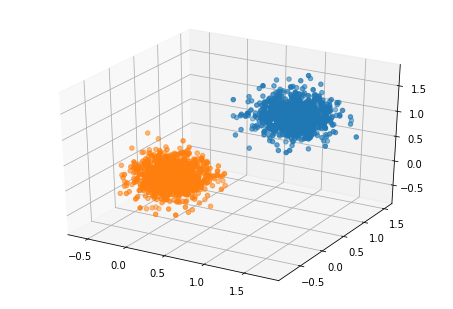

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

data = np.genfromtxt('dataset2.txt', delimiter=',')
np.random.shuffle(data) # scramble samples to break up any potential ordering
X = data[:,:-1]
y = data[:,-1]

def plot_data(X, y):
    fig = plt.figure()
    ax = Axes3D(fig)

    X1 = X[y==1]
    X2 = X[y==-1]
    ax.scatter(X1[:,0], X1[:,1], X1[:,2], 'r')
    ax.scatter(X2[:,0], X2[:,1], X2[:,2], 'b')

    plt.show()

LABEL1 = 1
LABEL2 = -1

# Copied from hw1
def sge(X):
    """
    SGE Mean and variance estimator for spherical Gaussian distribution

    X : Data matrix of size n x p where each row represents a p-dimensional data point
    e.g. X = [ 2 1 ; 3 7 ; 4 5 ] is a dataset having 3 samples having two co−ordinates each.
    mu : Estimated mean o f the dataset [mu_1 mu_2 . . . mu_p]
    variance : Estimated variance of the dataset ( number )
    """
    n=X.shape[0]
    p=X.shape[1]
    mu = np.mean(X, axis=0)
    diffs = X - mu
    variance  = 0
    for diff in diffs:
        variance += 1/(n*p) * diff.dot(diff.T)
    return mu, variance


def sph_bayes(Xtest, mu1, sigma1, mu2, sigma2):
    I = np.identity(len(mu1))
    p1 = multivariate_normal(mu1, I*sigma1).pdf(Xtest)
    p2 = multivariate_normal(mu2, I*sigma2).pdf(Xtest)
    P1 = p1/(p1+p2)
    P2 = p2/(p1+p2)
    Ytest = LABEL1 if P1 > P2 else LABEL2
    return [P1, P2, Ytest]

def new_classifier(Xtest, mu1, mu2):
    b = 0.5*(mu1 + mu2)
    norm = np.linalg.norm(mu1-mu2)
    Ytest = np.sign((mu1 - mu2).T.dot(Xtest - b)/norm)
    return Ytest

# Split data in 5 sets and do cross validation
avg_bayes_error = 0
avg_new_class_error = 0
num_splits = 5
split_size = int(X.shape[0] / num_splits)
for k in range(num_splits):
    X_train = np.concatenate((X[:k * split_size], X[(k + 1) * split_size:]), axis=0)
    X_test = X[k * split_size:(k + 1) * split_size]
    y_train = np.concatenate((y[:k * split_size], y[(k + 1) * split_size:]), axis=0)
    y_test = y[k * split_size:(k + 1) * split_size]
    
    X_train_1 = X_train[y_train==1]
    X_train_2 = X_train[y_train==-1]

    mu1, sigma1 = sge(X_train_1)
    mu2, sigma2 = sge(X_train_2)

    bayes_error, new_class_error = 0, 0
    stupid_error = 0
    for (i,x_test) in enumerate(X_test):
        P1, P2, bayes_pred = sph_bayes(x_test, mu1, sigma1, mu2, sigma2)
        bayes_error += (bayes_pred != y_test[i])/len(y_test)
    
        new_class_pred = new_classifier(x_test, mu1, mu2)
        new_class_error += (new_class_pred != y_test[i])/len(y_test)
                
    avg_bayes_error += bayes_error / num_splits
    avg_new_class_error += new_class_error / num_splits

    print('Bayes spherical error: %.5f' % bayes_error)
    print('New classifier error: %.5f' % new_class_error)
    
print('Average bayes spherical error: %.5f' % avg_bayes_error)
print('Average new classifier error: %.5f' % avg_new_class_error)

plot_data(X,y)


## [DIGITS dataset classifer, 5 points]

Load the DIGITS dataset:
```python
from sklearn import datasets
digits = datasets.load_digits()
```
This dataset contains $1797$ samples of ten handwritten digit classes. You can further query and visualize the dataset using the various attributes of the returned dictionary:
```python
data = digits.data
print(data.shape)
target_names = digits.target_names
print (target_names)
import matplotlib.pyplot as plt
y = digits.target
plt.matshow(digits.images[0])
plt.show()
```

a. Use **new_classifier()** designed previously to do binary classification between classes representing digits "*5*" and "*8*".

b. Investigate an alternative feature function as described below:

1. Scale each pixel value to range $[0, 1] $ from original gray-scale ($0-255$). 
2. Compute variance of each row and column of the image. This will give you a new feature vector of size $16$ i.e. 

$$ 
x' = \left[ \; Var(row_1)  , Var(row_2), \ldots , Var(row_{8}), Var(col_1), \ldots, Var(col_{8}) \;\right]^T
$$

c. Report $5$-fold cross validation results for parts $(a)$ and
$(b)$ in a single table. What can you say about the results?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()

data = digits.data

relevant_indices = (digits.target == 5) | (digits.target == 8)
X = data[relevant_indices]
print(type(X))
y = digits.target[relevant_indices]

X

def modify_data(data):
    new_data = data - np.min(data, axis=0)
    new_data = new_data - np.max(new_data, axis=0)
    for (sample_ind, sample) in enumerate(data):
        # row variances
        for i in range(8):
            new_data[sample_ind, i] = np.var(sample[i*8:(i+1)*8])
            new_data[sample_ind, i+8] = np.var(sample[i:8:])
    return new_data
        

# Split data in 5 sets and do cross validation
avg_unmodified_error, avg_modified_error = 0, 0
num_splits = 5
split_size = int(X.shape[0] / num_splits)
for k in range(num_splits):
    X_train = np.concatenate((X[:k * split_size], X[(k + 1) * split_size:]), axis=0)
    X_test = X[k * split_size:(k + 1) * split_size]
    y_train = np.concatenate((y[:k * split_size], y[(k + 1) * split_size:]), axis=0)
    y_test = y[k * split_size:(k + 1) * split_size]
    
    X_train_1 = X_train[y_train==5]
    X_train_2 = X_train[y_train==8]
    mu1 = np.mean(X_train_1, axis=0)
    mu2 = np.mean(X_train_2, axis=0)
    
    X_train_mod = modify_data(X_train)
    X_test_mod = modify_data(X_test)
    X_train_1_mod = X_train_mod[y_train==5]
    X_train_2_mod = X_train_mod[y_train==8]
    mu1_mod = np.mean(X_train_1_mod, axis=0)
    mu2_mod = np.mean(X_train_2_mod, axis=0)

    unmodified_error, modified_error = 0, 0
    for (i,x_test) in enumerate(X_test):
        unmodified_pred = new_classifier(x_test, mu1, mu2)
        unmodified_pred = 5 if unmodified_pred > 0 else 8
        unmodified_error += (unmodified_pred != y_test[i]) / len(y_test)
    
    for (i,x_test_mod) in enumerate(X_test_mod):
        modified_pred = new_classifier(x_test_mod, mu1_mod, mu2_mod)
        modified_pred = 5 if modified_pred > 0 else 8
        modified_error += (modified_pred != y_test[i]) / len(y_test)
            
    avg_unmodified_error += unmodified_error / num_splits
    avg_modified_error += modified_error / num_splits

    print('Unmodified data classifier error: %.5f' % unmodified_error)
    print('Modified data classifier error: %.5f' % modified_error)
    
print('Average unmodified data classifier error: %.5f' % avg_unmodified_error)
print('Average modified data classifier error: %.5f' % avg_modified_error)
